In [ ]:
# This lecture shows you the applications of curve fitting,
# linear regression, and cubic interpolation. 


In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
from sklearn import *  # this is bad


In [5]:
x=np.linspace(0,5*np.pi)
noise=np.random.normal(0,2,len(x))
y=30*np.sin(2*x)+noise

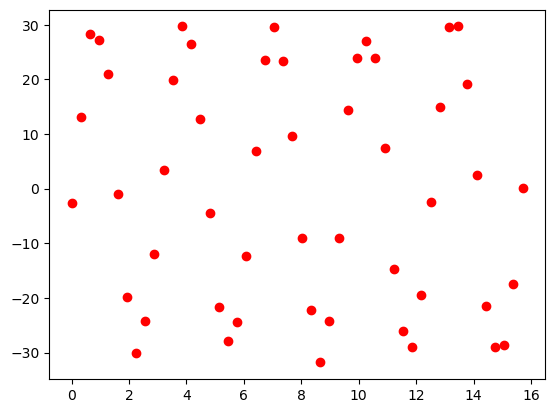

In [6]:
plt.plot(x,y,'ro')

In [7]:
f=lambda x,a,b,c:a*np.cos(b*x+c)

In [8]:
# to fit your periodical data, the guessed frequency
# is very sensitive to the final result, 
# the error should be less than 10%

ans,covar=sp.optimize.curve_fit(f,x,y,[500,1.7,0])


In [9]:
ans

array([29.76003082,  2.00655888, -1.6288814 ])

In [10]:
covar

array([[ 1.19397314e-01,  3.34719724e-05, -2.61638626e-04],
       [ 3.34719724e-05,  5.74467505e-06, -4.51041163e-05],
       [-2.61638626e-04, -4.51041163e-05,  4.82766602e-04]])

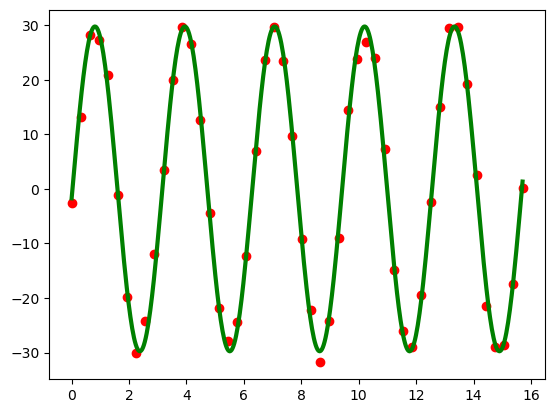

In [11]:
test=np.linspace(0,5*np.pi,500)
plt.plot(x,y,'ro')
plt.plot(test,f(test,ans[0],ans[1],ans[2]),'g-',lw=3)

In [12]:
# non-periodical curves
x=np.linspace(0,5,25)

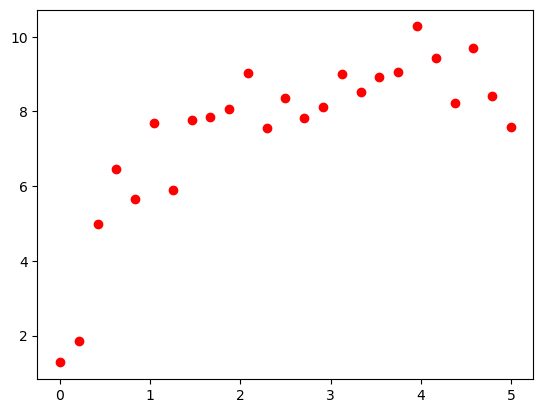

In [13]:
y=10-5/(0.5+x)+np.random.standard_normal(len(x))
plt.plot(x,y,'ro')

In [14]:
z1=np.polyfit(x,y,1)
p1=np.poly1d(z1)
p1

poly1d([1.06239207, 4.84412081])

In [15]:
test=np.linspace(0,5,300)


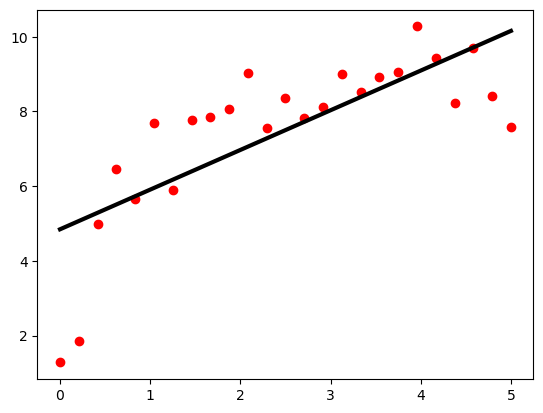

In [16]:
plt.plot(x,y,'ro')
plt.plot(test,p1(test),'k-',lw=3)

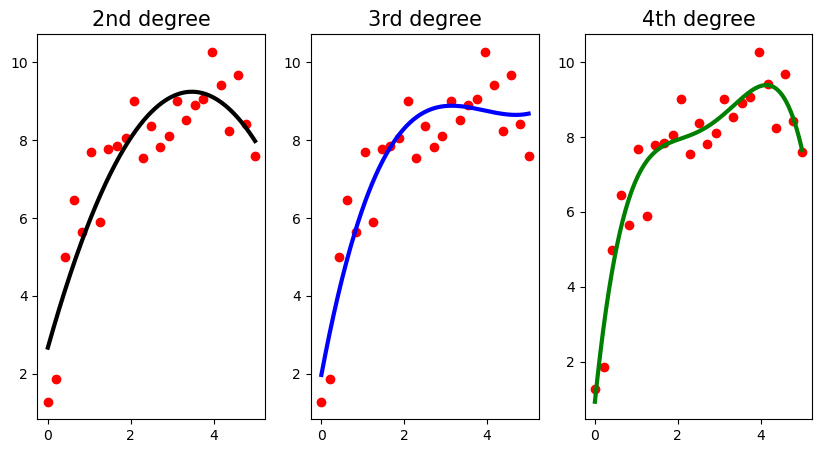

In [17]:
plt.figure(figsize=(10,5))
cm='rmkbg'
order=['2nd ','3rd ','4th ']
for i in range(2,5):
    z=np.polyfit(x,y,i)
    p=np.poly1d(z)
    plt.subplot(129+i)
    plt.plot(x,y,'ro')
    plt.plot(test,p(test),cm[i]+'-',lw=3)
    plt.title(order[i-2]+'degree',fontsize=15)
    

In [18]:
X1=np.array([x**i for i in range(2)]).T
X1

array([[1.        , 0.        ],
       [1.        , 0.20833333],
       [1.        , 0.41666667],
       [1.        , 0.625     ],
       [1.        , 0.83333333],
       [1.        , 1.04166667],
       [1.        , 1.25      ],
       [1.        , 1.45833333],
       [1.        , 1.66666667],
       [1.        , 1.875     ],
       [1.        , 2.08333333],
       [1.        , 2.29166667],
       [1.        , 2.5       ],
       [1.        , 2.70833333],
       [1.        , 2.91666667],
       [1.        , 3.125     ],
       [1.        , 3.33333333],
       [1.        , 3.54166667],
       [1.        , 3.75      ],
       [1.        , 3.95833333],
       [1.        , 4.16666667],
       [1.        , 4.375     ],
       [1.        , 4.58333333],
       [1.        , 4.79166667],
       [1.        , 5.        ]])

In [19]:
t=np.linspace(0,5,300)
T=np.array([t**i for i in range(2)]).T

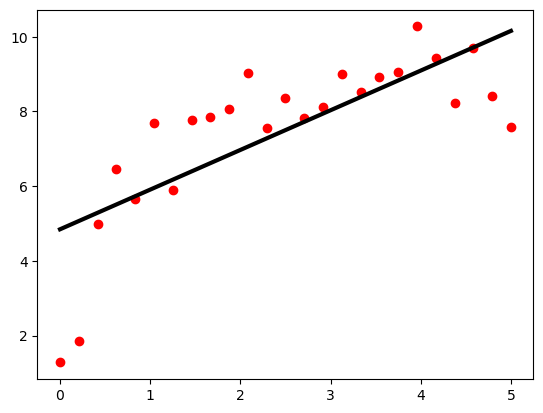

In [20]:
model=sk.linear_model.LinearRegression()
model.fit(X1,y)
yp1=model.predict(T)
plt.plot(x,y,'ro')
plt.plot(t,yp1,'k-',lw=3)

In [21]:
c='kbg'

In [22]:
degree=['2nd order','3rd order','4th order']
model=sk.linear_model.LinearRegression()

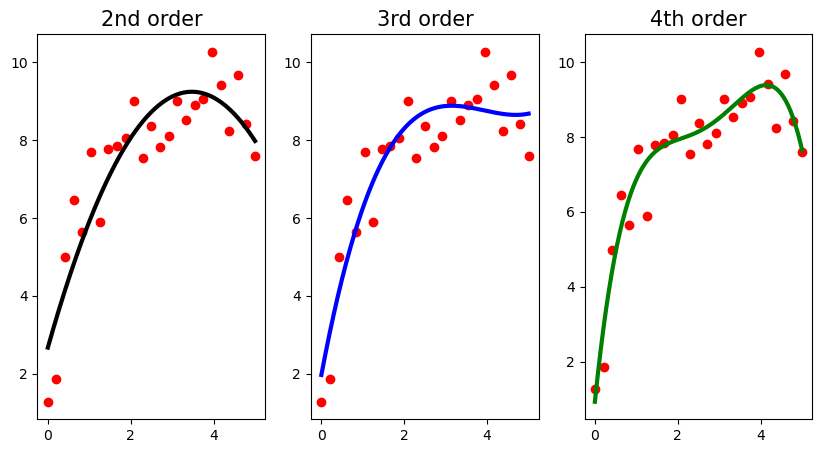

In [26]:
plt.figure(figsize=(10,5))
for i in range(2,5):
    X=np.array([x**j for j in range(i+1)]).T
    T=np.array([t**j for j in range(i+1)]).T
    model.fit(X,y)
    yp=model.predict(T)
    plt.subplot(131+i-2)
    plt.plot(x,y,'ro')
    plt.plot(t,yp,c[i-2]+'-',lw=3)
    plt.title(degree[i-2],fontsize=15)
    
    

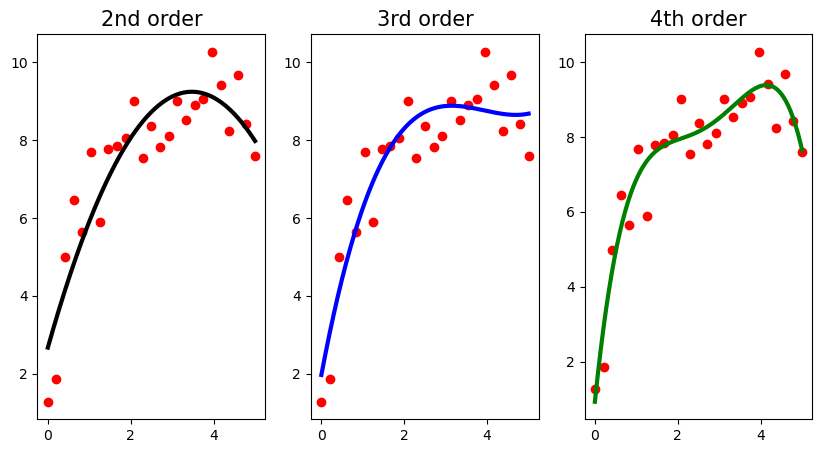

In [31]:
plt.figure(figsize=(10,5))
for i in range(2,5):
    pipe=sk.pipeline.make_pipeline(
        sk.preprocessing.PolynomialFeatures(i),
        sk.linear_model.LinearRegression())
    pipe.fit(x[:,np.newaxis],y)
    yp=pipe.predict(t[:,np.newaxis])
    plt.subplot(131+i-2)
    plt.plot(x,y,'ro')
    plt.plot(t,yp,c[i-2]+'-',lw=3)
    plt.title(degree[i-2],fontsize=15)
    


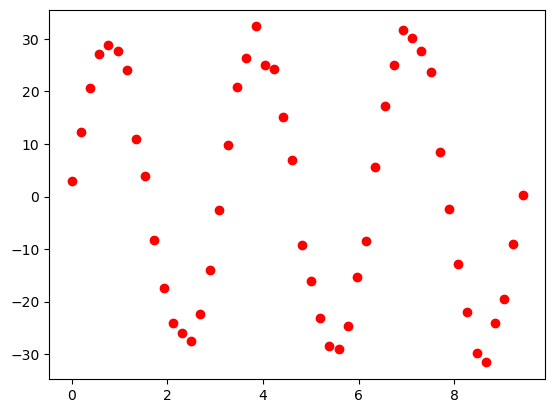

In [36]:
x=np.linspace(0,3*np.pi)
noise=np.random.normal(0,2,len(x))
y=30*np.sin(2*x)+noise
plt.plot(x,y,'ro')



In [37]:
sm=sp.interpolate.make_smoothing_spline(x,y)
inter=sp.interpolate.make_interp_spline(x,y,k=5)
cubic=sp.interpolate.CubicSpline(x,y)


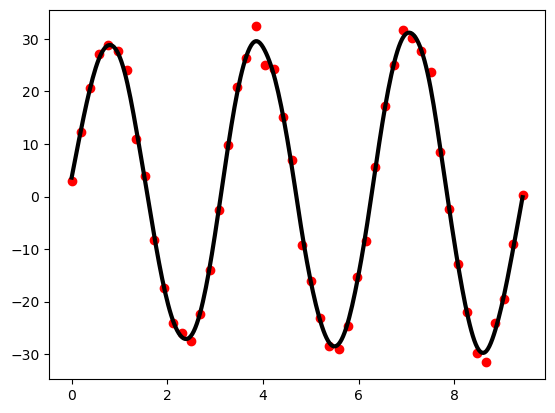

In [38]:
t=np.linspace(0,3*np.pi,300)
plt.plot(x,y,'ro')
plt.plot(t,sm(t),'k-',lw=3)

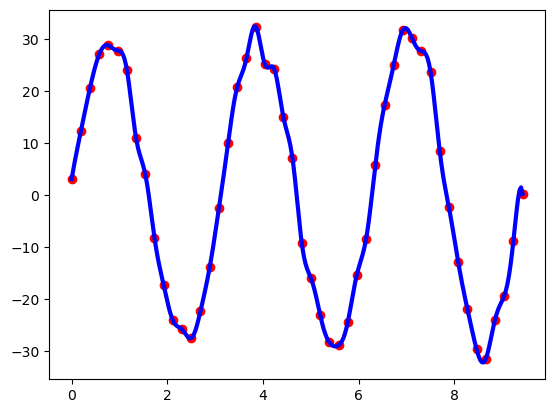

In [39]:
plt.plot(x,y,'ro')
plt.plot(t,inter(t),'b-',lw=3)

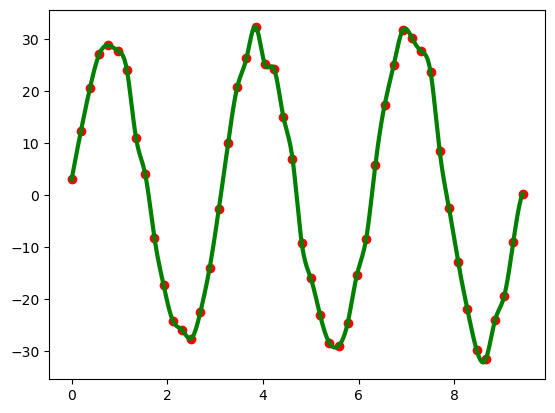

In [40]:
plt.plot(x,y,'ro')
plt.plot(t,cubic(t),'g-',lw=3)

In [41]:
smD=sm.derivative()
interD=inter.derivative()
cubicD=cubic.derivative()


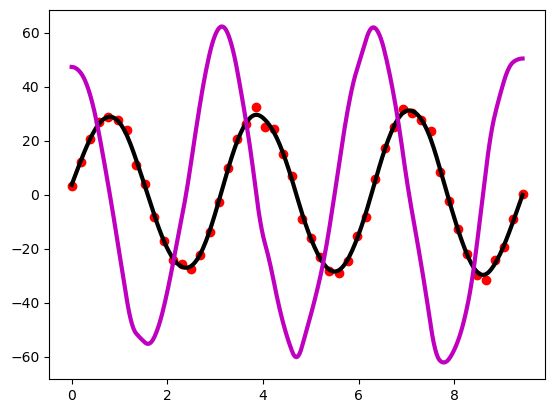

In [42]:
plt.plot(x,y,'ro')
plt.plot(t,sm(t),'k-',lw=3)
plt.plot(t,smD(t),'m-',lw=3)

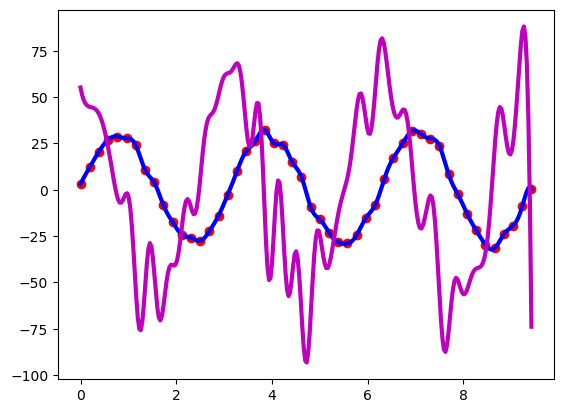

In [43]:
plt.plot(x,y,'ro')
plt.plot(t,inter(t),'b-',lw=3)
plt.plot(t,interD(t),'m-',lw=3)

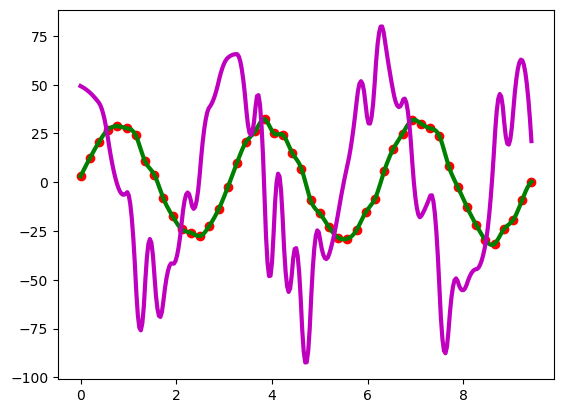

In [44]:
plt.plot(x,y,'ro')
plt.plot(t,cubic(t),'g-',lw=3)
plt.plot(t,cubicD(t),'m-',lw=3)